Implementation of intertemporal choice model example in Cavagnaro, D. R., Aranovich, G. J., McClure, S. M., Pitt, M. A., and Myung, J. I. (2016). On the Functional Form of Temporal Discounting: An Optimized Adaptive Test.

In [1]:
import numpy as np
np.random.seed(0)

In [2]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pybad.tasks.intertemporal_choice import *

In [3]:
models = init_models()
funcs = [ 
    exponential, hyperbolic, constant_sensitivity, generalized_hyperbolic, 
    beta_delta, double_exponential 
]
colors = [ "aqua", "green", "blue", "red", "black", "pink" ]
ridx = np.repeat([1,2], 3)
cidx = np.tile([1,2,3], 2)
x = np.linspace(0, 80, 81)

In [4]:
true_model = cs_logistic
true_params = (.025,.4)
true_idx = 2

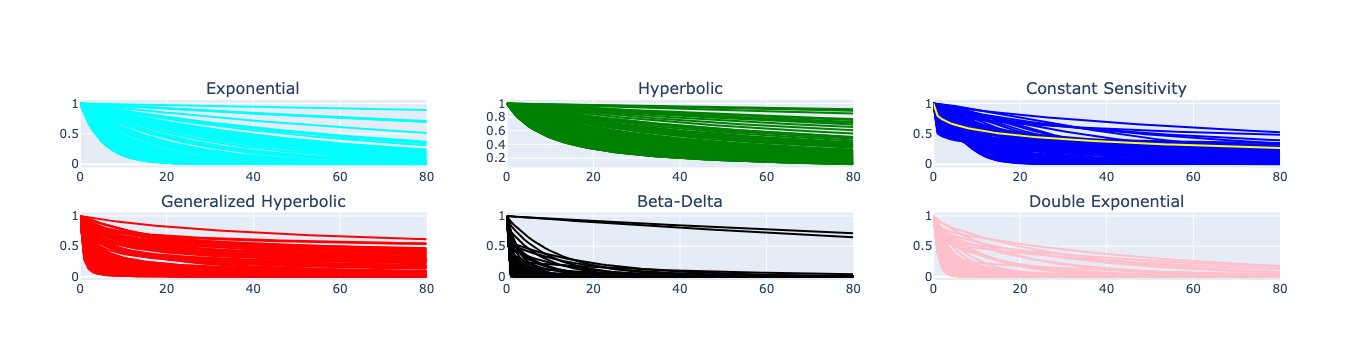

In [5]:
fig = make_subplots(rows=2, cols=3,
                    subplot_titles=[ "Exponential", "Hyperbolic",
                                     "Constant Sensitivity",
                                     "Generalized Hyperbolic", "Beta-Delta",
                                     "Double Exponential"
                                   ]
                   )

for ii in range(6):
    Theta = models[ii].dist.samples[:100,:]
    for theta in Theta: 
        fig.add_trace(
            go.Scatter(
                x=x,
                y=funcs[ii](*theta, x),
                mode="lines",
                line=dict(color=colors[ii])
            ),
            row=ridx[ii], col=cidx[ii]
        )
        
    if ii == true_idx:
        fig.add_trace(
            go.Scatter(
                x=x,
                y=funcs[ii](*true_params, x),
                mode="lines",
                line=dict(color="yellow")
            ),
            row=ridx[ii], col=cidx[ii]
        )

fig.update_layout(showlegend=False)
fig.show()

In [6]:
designLabs = ["Geometric", "Random", "Kirby", "Optimal Adaptive Design"]

In [7]:
response_func = response_function(true_model=cs_logistic, true_params=(.025,.4))
data_geom = run_experiment(geometric, response_func, "geometric")
data_rand = run_experiment(random, response_func, "random")
data_kirby = run_experiment(kirby, response_func, "kirby")
data_ado = run_experiment(ado, response_func, "ado")

100%|█████████████████████████████████████████| 81/81 [1:15:17<00:00, 55.78s/it]


In [8]:
post_prob = np.array([ dat["modelprobs"] for dat in [data_geom,data_rand,data_kirby,data_ado] ])

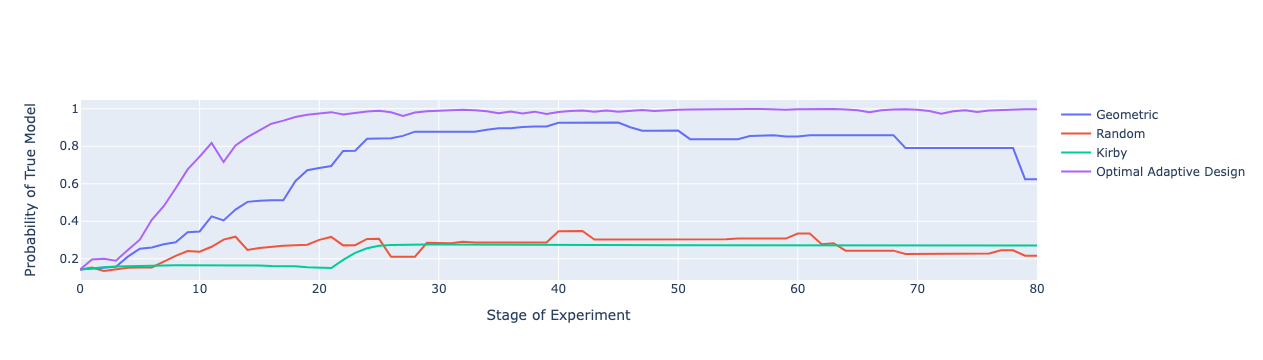

In [9]:
fig = go.Figure()

for ii in range(4):
    fig.add_trace(
        go.Scatter(
            x=np.arange(81),
            y=post_prob[ii,:,true_idx],
            name=designLabs[ii]
        )
    )
    
fig.update_layout(xaxis=dict(title="Stage of Experiment"),
                  yaxis=dict(title="Probability of True Model"))
fig.show()